# Data Understanding

## Data Ingestion

**[Term] Data Ingestion**

Data ingestion is the process of obtaining and importing data for immediate use or storage.

For this session we'll "ingest" the data from google drive and save it as a csv file using the following code

In [1]:
# !pip install gdown

In [2]:
import gdown

dataset_url = "https://drive.google.com/u/1/uc?id=1Wt1eQkZz76gqRL9h8R6FOEPH3eLsbLsA&export=download"
filename = "healthcare-dataset-stroke-data.csv"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/u/1/uc?id=1Wt1eQkZz76gqRL9h8R6FOEPH3eLsbLsA&export=download
To: /media/rajendra_/A0A80645A8061A84/Data science/Project/Project_02/healthcare-dataset-stroke-data.csv
100%|████████████████████████████████████████| 317k/317k [00:00<00:00, 2.54MB/s]


'healthcare-dataset-stroke-data.csv'

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(filename)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We can call the `info()` method of the dataframe to print it's information including the index (#), datatype (dtype) and columns, non-null values (will be discussed later) and memory usage.

In [5]:
##  info() method to print dataframe information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* From the above information DataFrame contains total 12 columns and 5110 rows, we can see some missing values in bmi, and datatypes of columns contains 3 float64, 4 int64 and 5 objects

## Exploratory Data Analysis and Data Cleaning

**[Term] Exploratory Data Analysis (EDA)**

EDA is an approach of analyzing data sets to summarize their main characteristics

**[Term] Data Cleaning**

Data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

### Missing Data

In [6]:


df.isnull()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In the output above, `True` denotes a *null* value and `False` denotes a *non-null* value.

In [7]:
## Geting total missing values in each column (features)

df.isnull().sum(axis=0)  # axis = 0 default


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

"bmi" columns of the DataFrame contains 201 missing values.

##### Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Let us now try to visualize where our missing values lie within the dataset

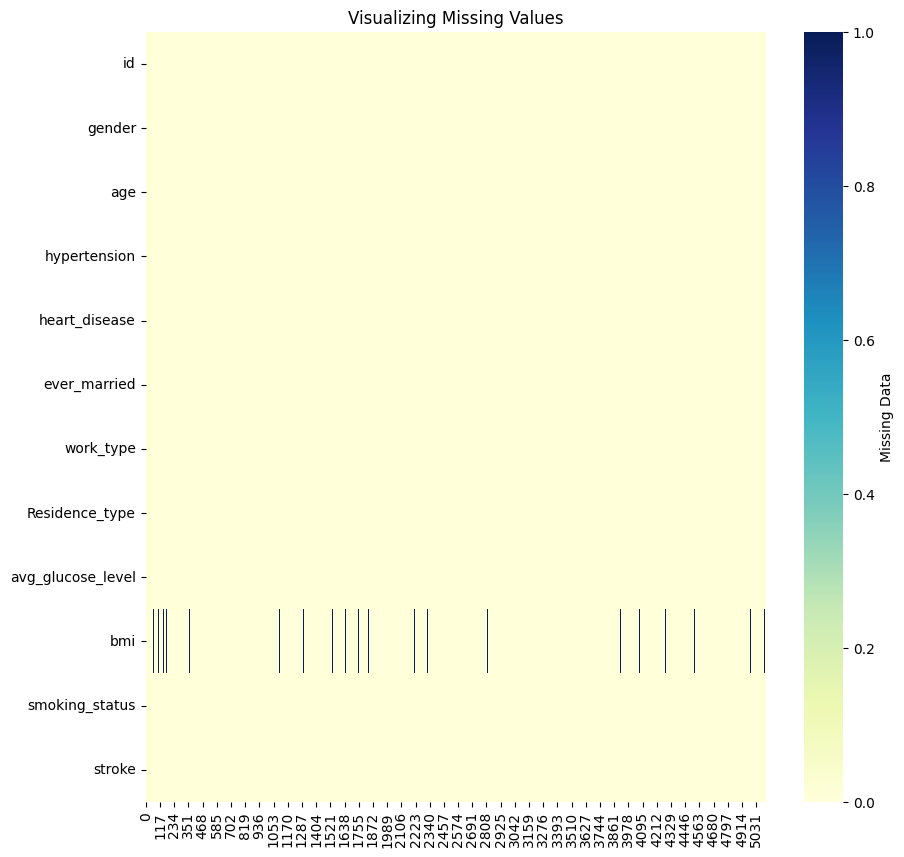

In [9]:
plt.figure(figsize=(10, 10))
plt.title("Visualizing Missing Values")
sns.heatmap(
    df.isna().transpose(),
    cmap="YlGnBu",  # Set a yellow -> green -> blue color gradient
    cbar_kws={"label": "Missing Data"}
)
plt.show()

<li>With the above visualization technique using seaborn heatmap, we can see bmi columns only contains missing values.</li>


### Univariate Analysis

#### Categorical Variables

For a categorical variable we need to first count the number of data points in each category to analyze the data distribution.

#### gender

In [10]:
## Counting each category in the column named "gender"

df["gender"].value_counts()


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

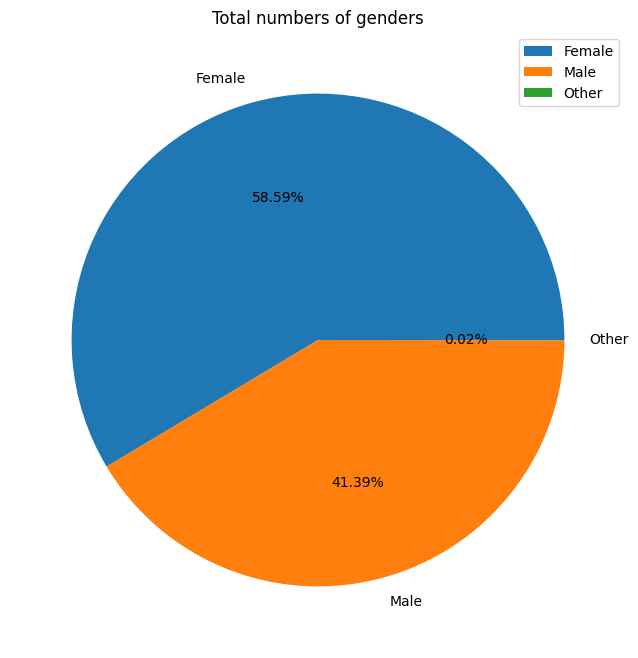

In [11]:
## Visualizing the `value_counts()` using the piechart
data = df["gender"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(data.values, labels=data.index, autopct="%.2f%%")
plt.legend()
plt.title("Total numbers of genders")
plt.show()


Let's stylize it and put it in a function for ease of use

In [12]:
def univariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    # Get value counts
    value_counts = data[xlabel].value_counts()
    ax = value_counts.plot.bar(
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    total = value_counts.sum()
    # Add percentage label for each plot
    for plot in ax.patches:
        height = plot.get_height()
        ax.annotate(
            # Percentage label text
            f"{height / total * 100:.1f}%",
            xy=(
                # Percentage label x co-ordinate
                plot.get_x() + plot.get_width() / 2.,
                # Percentage label y co-ordinate
                height,
            ),
            # Percentage label horizontal align
            ha="center",

        )

    ax.set_title(f"Distribution of {xlabel} in the dataset", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

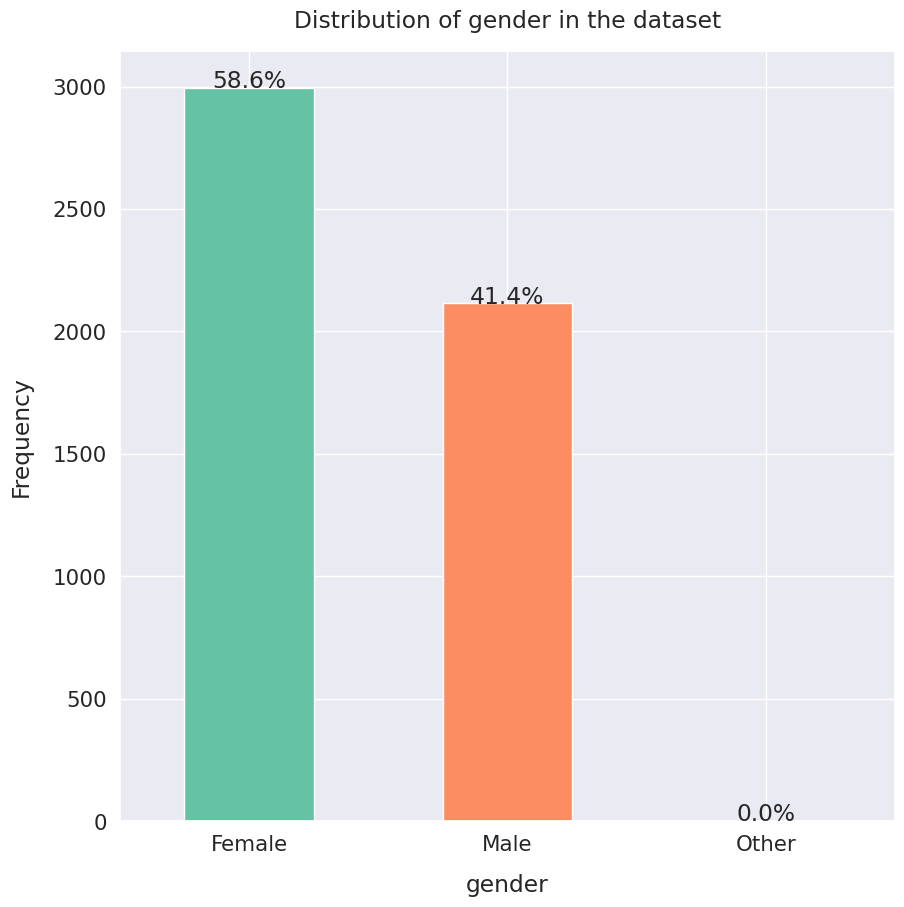

In [13]:
## using univariate_barplot() function to visualize distribution of gender column

univariate_barplot(data=df, xlabel="gender")


<li>"gender" columns in the dataframe contains 58.6% total female population and 41.4% total male population.</li>
<li>Female population dominates the population of male which can be seen in the above bargraph.</li>

In [14]:
## Filtering "Other" from "gender" and reset dataframe index

df.drop(df[df["gender"] == "Other"].index, inplace=True)


In [15]:
df.reset_index(drop=True, inplace=True)

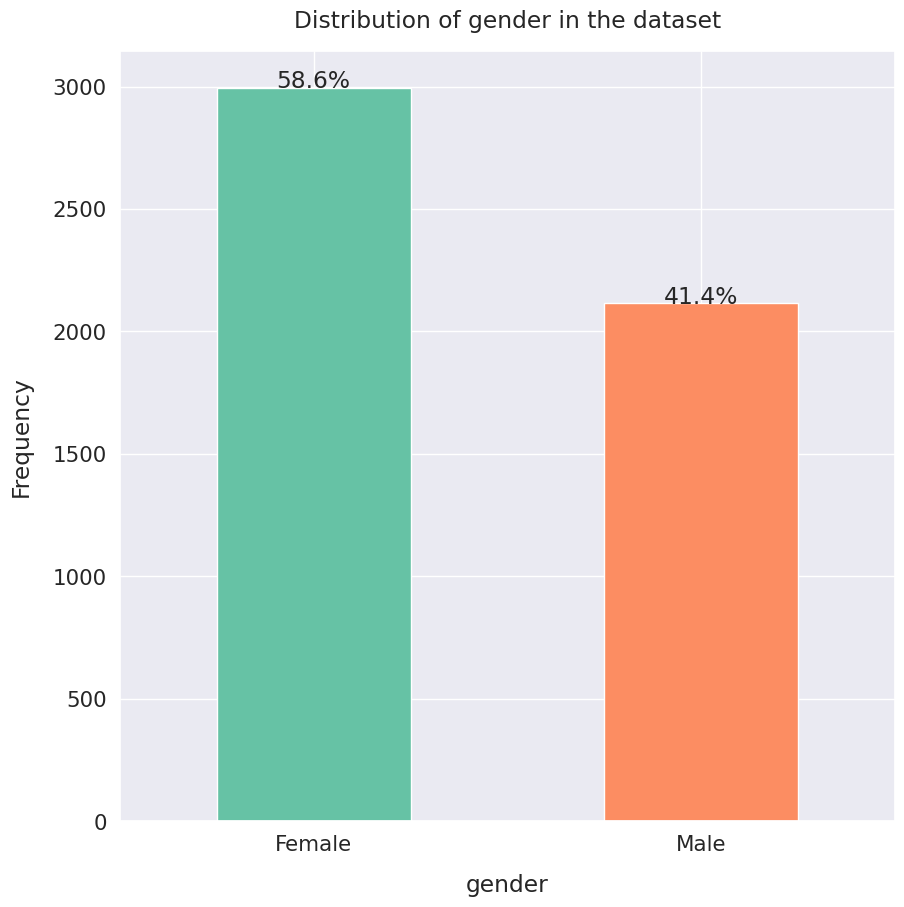

In [16]:
## Display plot for "gender" again to visualize the difference

univariate_barplot(data=df, xlabel="gender")


#### ever_married

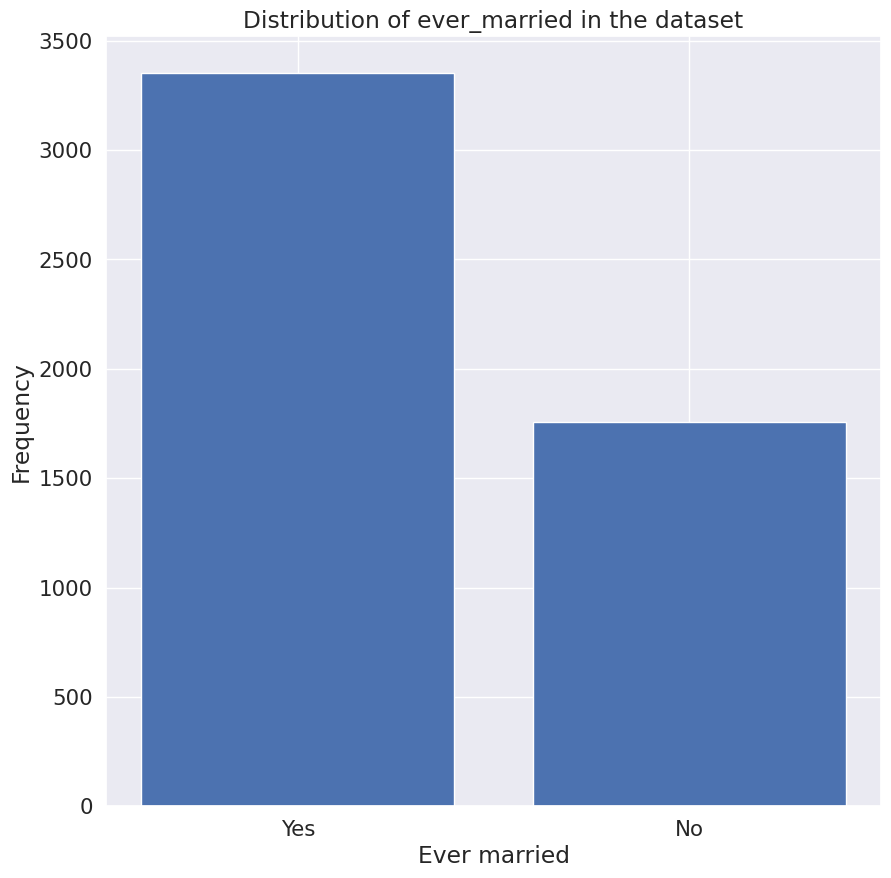

In [17]:
## Display plot for "ever_married"
data = df.ever_married.value_counts()
plt.figure(figsize=(10, 10))
plt.bar(x=data.index, height=data.values)
plt.xlabel("Ever married")
plt.ylabel("Frequency")
plt.title("Distribution of ever_married in the dataset")
plt.show()


<li>From the above barplot it can be seen that married people are nearly double than unmarried people.</li>

#### Residence_type

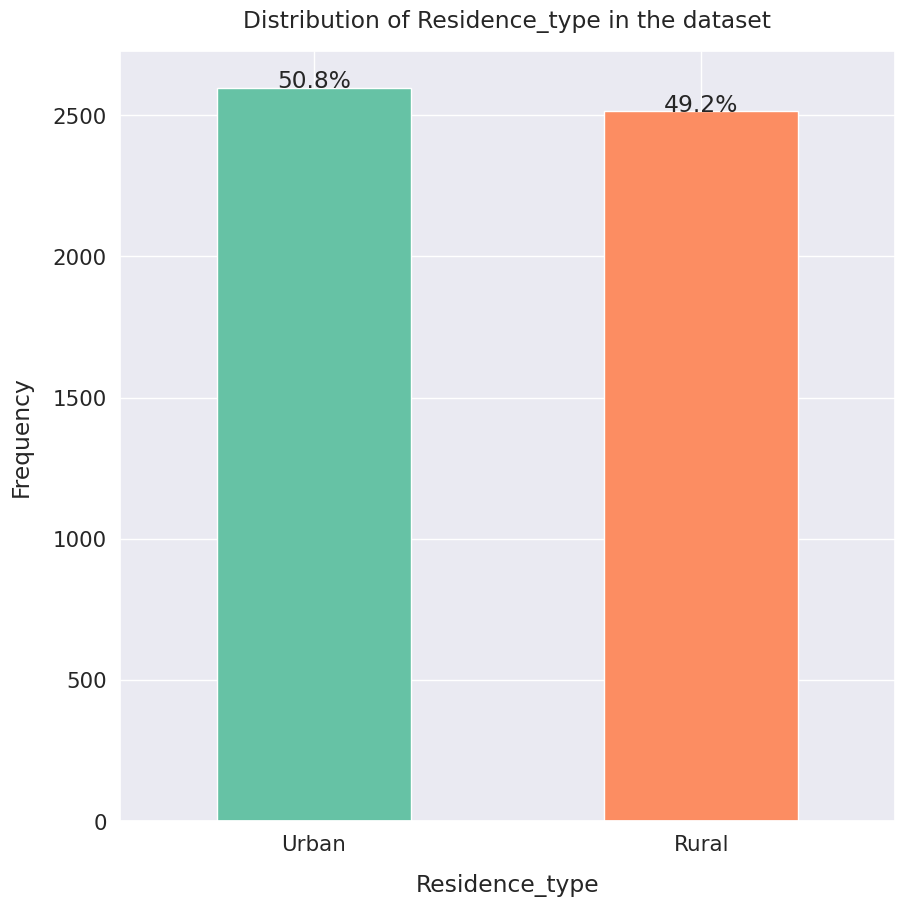

In [18]:
## Display plot for residence_type
univariate_barplot(data=df, xlabel="Residence_type")


<li>From the above barplot it can be seen than urban residence type is 50.8% whereas rural residence type is 49.2%.</li>


**<h4>work_type</h4>**

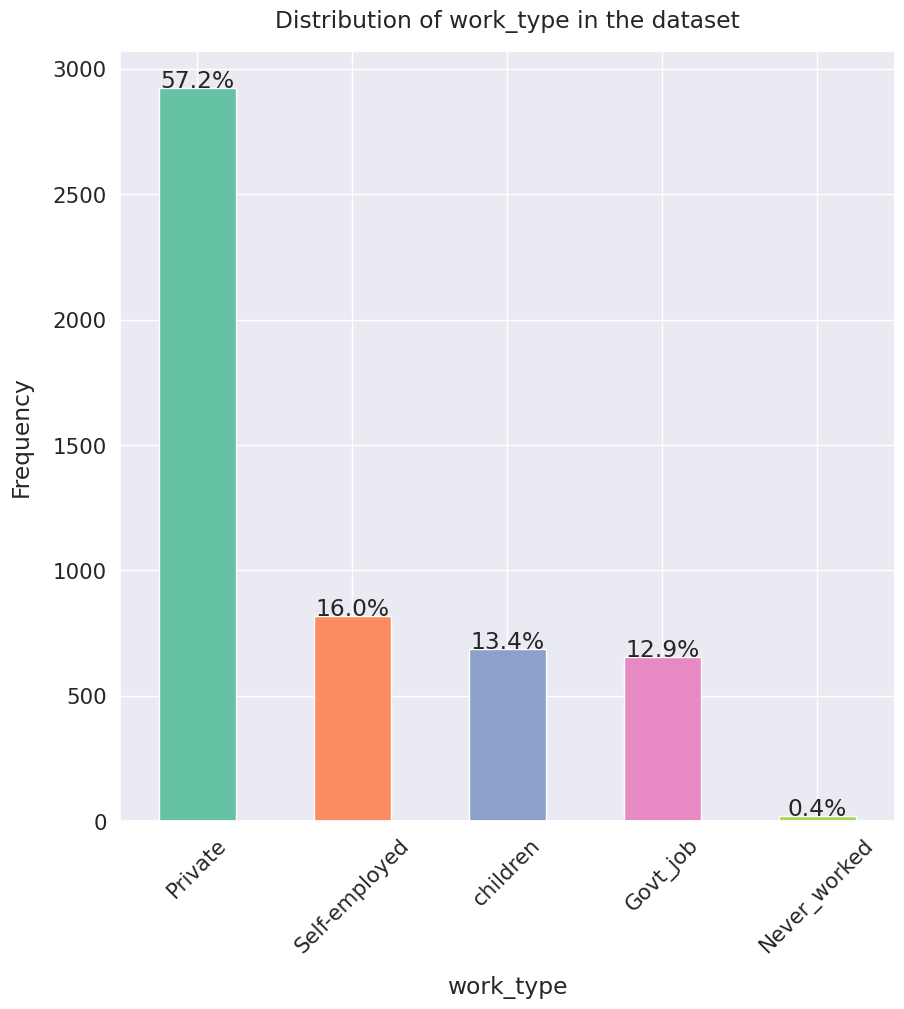

In [19]:
## Display plot for "work_type"

univariate_barplot(data=df, xlabel="work_type", xlabel_rotation=45)


* From the above bargraph we can see that people who work in the private company are 57.2%. Similarly people who are self employed are 16% followed by children 13%. People who work goverment job are 12.9% and never worked are 0.4%.

#### smoking_status

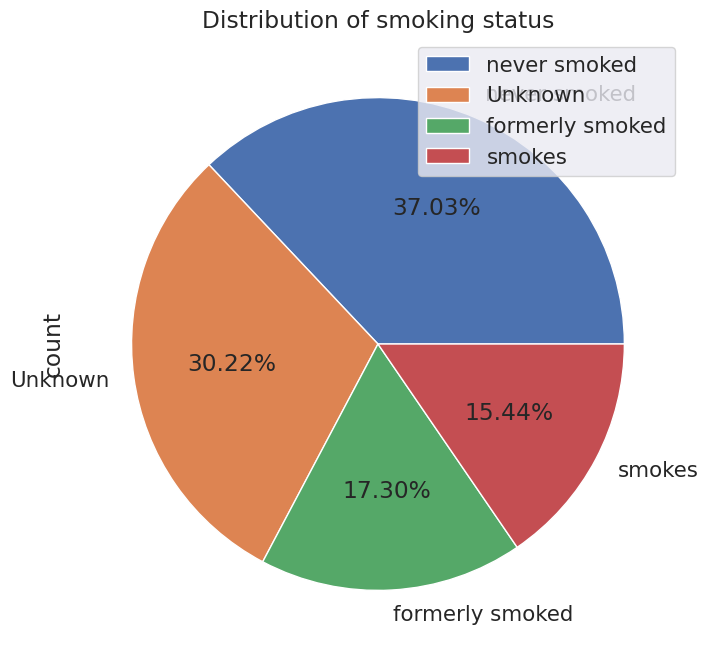

In [20]:
## Display plot for "smoking"

plt.figure(figsize=(12, 8))
data = df["smoking_status"].value_counts()
data.plot.pie(autopct="%.2f%%")
plt.legend()
plt.title("Distribution of smoking status")
plt.show()


<li>From the above pieplot we can see that highest number of population that is 37.03% are non smoker where as 17% population has previously smoked and 15.44% people smokes now.</li>
<li>We can also see that there is no information about 30.22% of the poulation.</li>


#### Numerical Variables

#### hypertension

We use the `describe()` method of a pandas dataframe to analyze a numeric variable's data distribution

In [21]:
df.hypertension.describe()

count    5109.000000
mean        0.097475
std         0.296633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

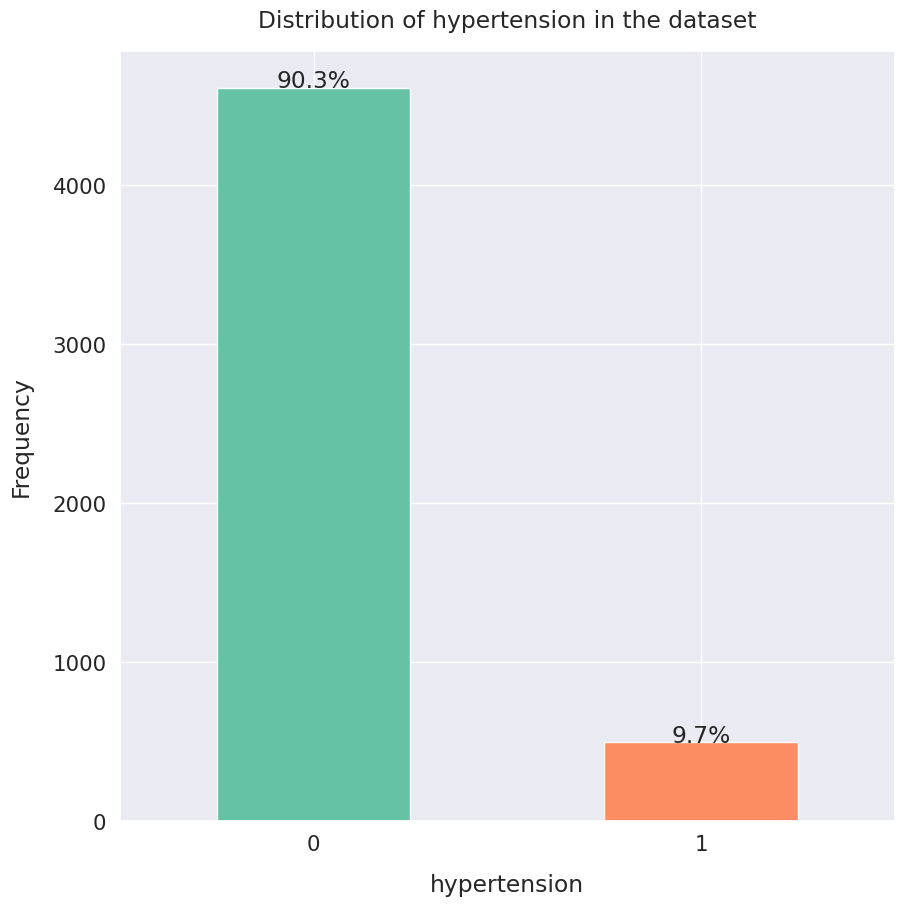

In [22]:
##  bar plot for "hypertension" field

univariate_barplot(data=df, xlabel="hypertension")


<li>From the above barplot it can be seen that number of frequency who doesn't have hypertension is 90.3% whereas rest of the people have hypertension.</li>

#### heart_disease

In [23]:

df.heart_disease.describe()


count    5109.000000
mean        0.054022
std         0.226084
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64

In [24]:
df.heart_disease.unique()

array([1, 0])

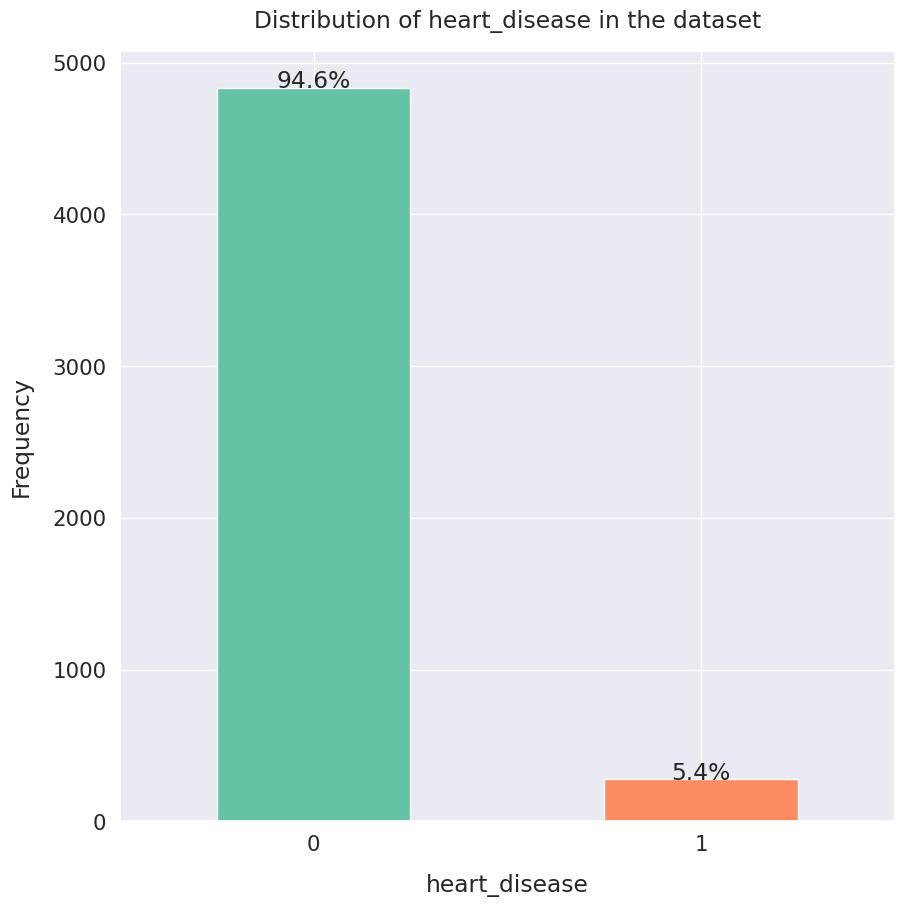

In [25]:
##  bar plot for "heart_disease" field

univariate_barplot(data=df, xlabel="heart_disease")


<li>According to above barplot 94.6% people doesn't have heart disease and rest 5.4% of the people have heart disease.</li>

In [26]:
## List all the categorical features  in the data

categorical_features = [
    "hypertension",
    "gender",
    "heart_disease",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status",
]
print(f"The number of categorical features in our dataset is {len(categorical_features)}.")
df.head()

The number of categorical features in our dataset is 7.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
## List all the categorical features in the data

numerical_features = [
    "age",
    "avg_glucose_level",
    "bmi",
]
print(f"The number of numerial features in our dataset is {len(numerical_features)}.")

The number of numerial features in our dataset is 3.


As mentioned before, we can use the `describe()` method of a pandas dataframe to analyze a numeric variable's data distribution

In [28]:
df[numerical_features].describe()


,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,4908.00000
mean,43.229986,106.140399,28.89456
std,22.613575,45.285004,7.85432
min,0.080000,55.120000,10.30000
25%,25.000000,77.240000,23.50000
50%,45.000000,91.880000,28.10000
75%,61.000000,114.090000,33.10000
max,82.000000,271.740000,97.60000


#### From above description:
<li>In age column, total count is 5190, mean is 43.229, standard deviation is 22.61, minimum value is 0.08, max value is 82 and quartiles(q1, q2, q3) are 25, 45 and 61 resplectively</li>
<li>Similarly, we have all such data distribution of avg_glucose_level and bmi as well but we can see that with the count in bmi there are some missing value.</li>

Other than the data description the best way to visualize a numerical variable is to look at its distribution plot

#### age

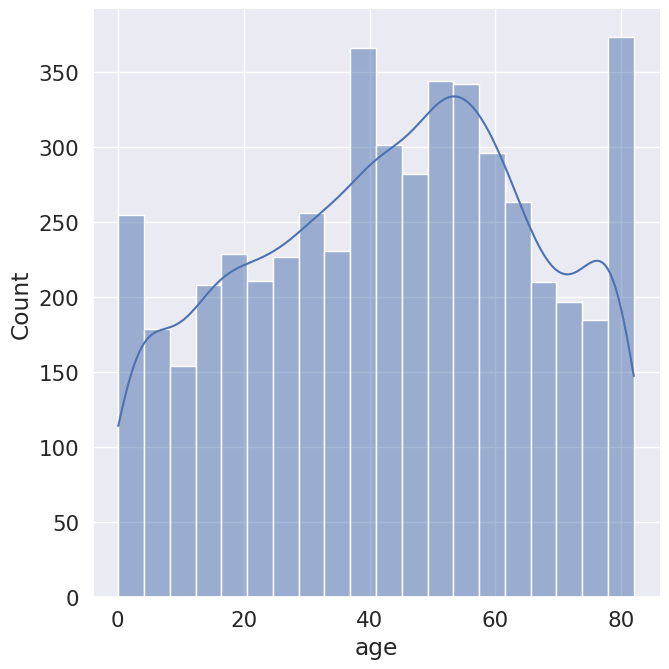

In [29]:
sns.displot(data=df.age, kde=True, height=7)
plt.show()

#### bmi

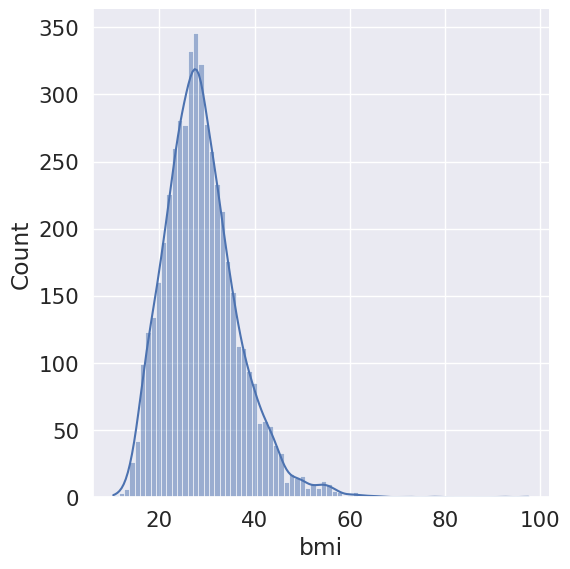

In [30]:
##  distribution plot for "bmi" field

sns.displot(data=df.bmi, kde=True, height=6)  
plt.show()


#### avg_glucose_level

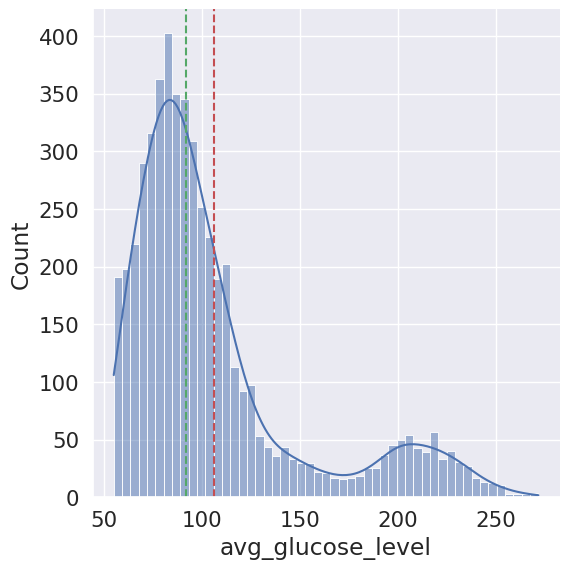

In [31]:
##  distribution plot for "avg_glucose_level" field

# calculating mean and median of the column avg_glucose_level in the DataFrame
mean = df.avg_glucose_level.mean()
median = df.avg_glucose_level.median()

sns.displot(data=df.avg_glucose_level, kde=True, height=6)
plt.axvline(mean, color="r", linestyle="dashed")
plt.axvline(median, color="g", linestyle="dashed")
plt.show()


#### Data Skewness



In [32]:
df[numerical_features].skew()

age                 -0.137430
avg_glucose_level    1.572815
bmi                  1.055063
dtype: float64

### Target Variable Analysis: stroke

In [33]:
target_variable = "stroke"

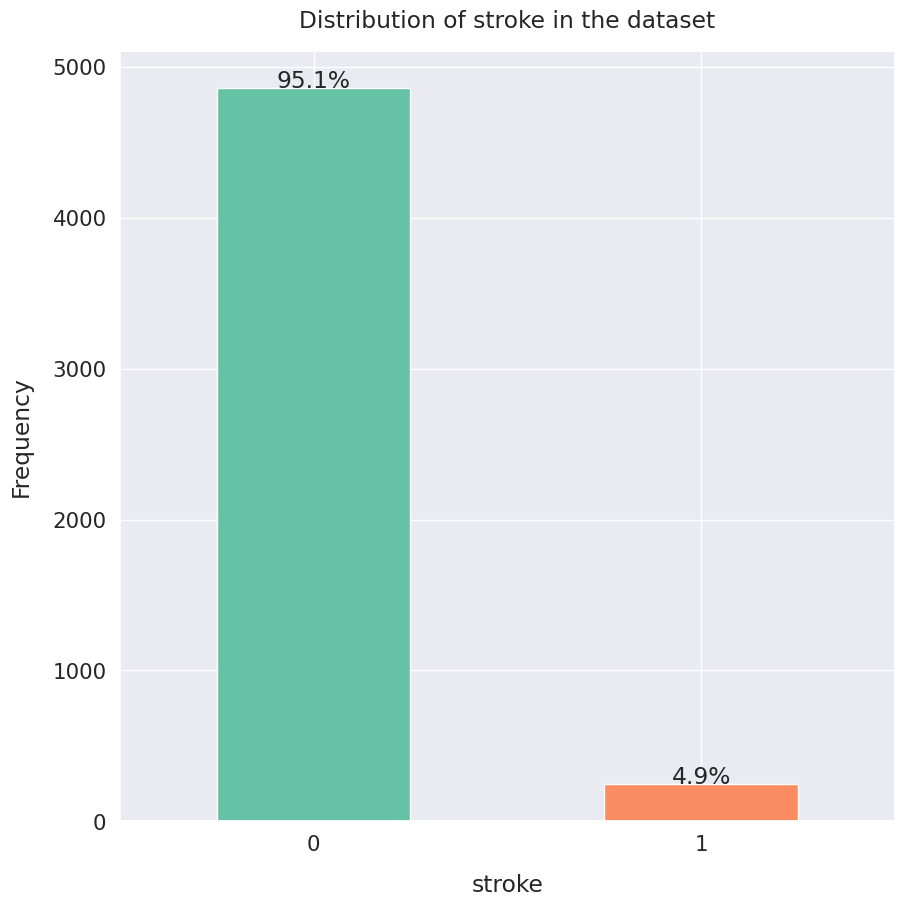

In [34]:
##  barplot for our target variable

univariate_barplot(data=df, xlabel="stroke")


<li>Approximately 95.1% of the population does not experience strokes, while 4.9% are affected by stroke.</li>
<li>Since, target class doesn't have same distribution so it is imbalanced dataset.</li>

### Bivariate Analysis

#### work_type vs age

pandas provides an `agg()` method on groupby objects to aggregate using one or more operations over the specified axis.

In [35]:
df.groupby("work_type").agg({"age": "describe"})

age                                                      
                count       mean        std    min    25%   50%   75%   max
work_type                                                                  
Govt_job        657.0  50.879756  15.438879  14.00  40.00  51.0  62.0  82.0
Never_worked     22.0  16.181818   2.342899  13.00  14.25  16.0  17.0  23.0
Private        2924.0  45.510602  18.443826   8.00  30.00  45.0  59.0  82.0
Self-employed   819.0  60.201465  16.835961   7.00  49.00  63.0  75.0  82.0
children        687.0   6.841339   4.533364   0.08   2.00   6.0  11.0  16.0

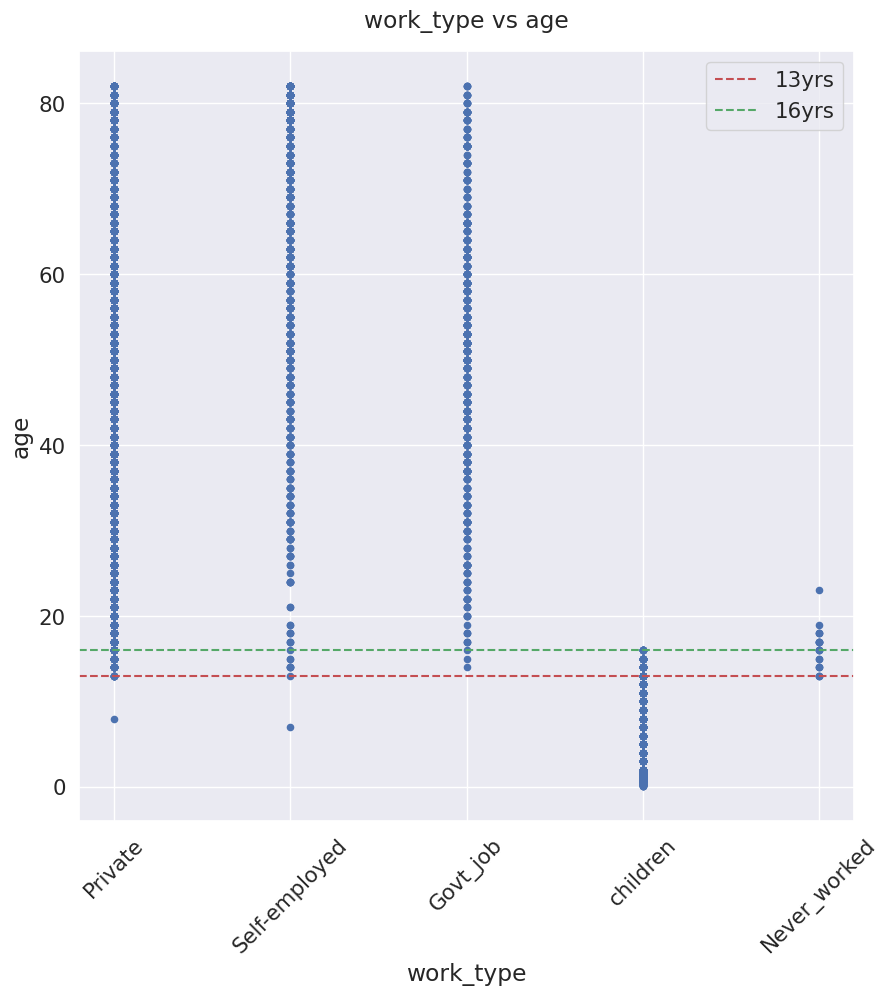

In [36]:
ax = df.plot.scatter(x="work_type", y="age", rot=45, figsize=(10, 10))
ax.set_title("work_type vs age", y=1.02)
ax.axhline(y=13, c="r", linestyle="dashed", label="13yrs")
ax.axhline(y=16, c="g", linestyle="dashed", label="16yrs")
plt.legend()
plt.show()

In [37]:
df.loc[df["work_type"] == "children", "work_type"] = "Never_worked"
df.loc[(df["work_type"] == "Private") & (df["age"] < 13), "age"] = 13
df.loc[(df["work_type"] == "Self-employed") & (df["age"] < 13), "age"] = 13

Let us now look at the updated plots of *work_type*

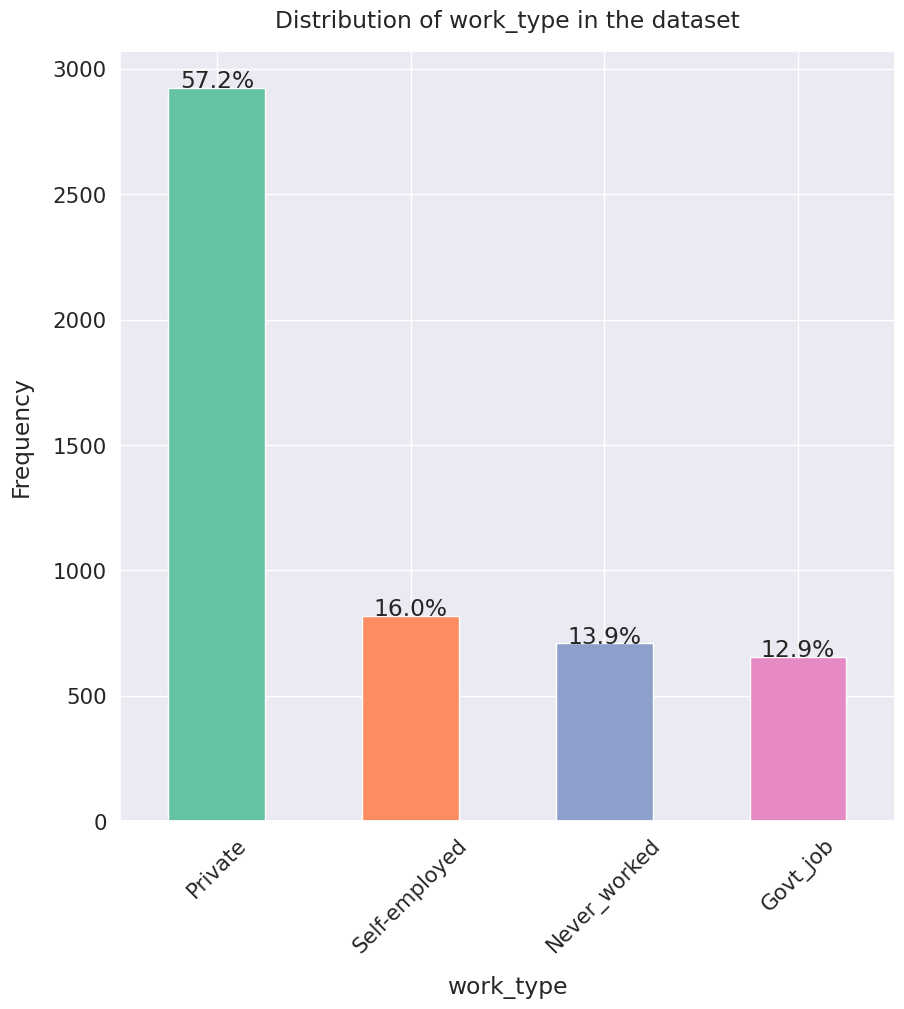

In [38]:
univariate_barplot(df, "work_type", xlabel_rotation=45)

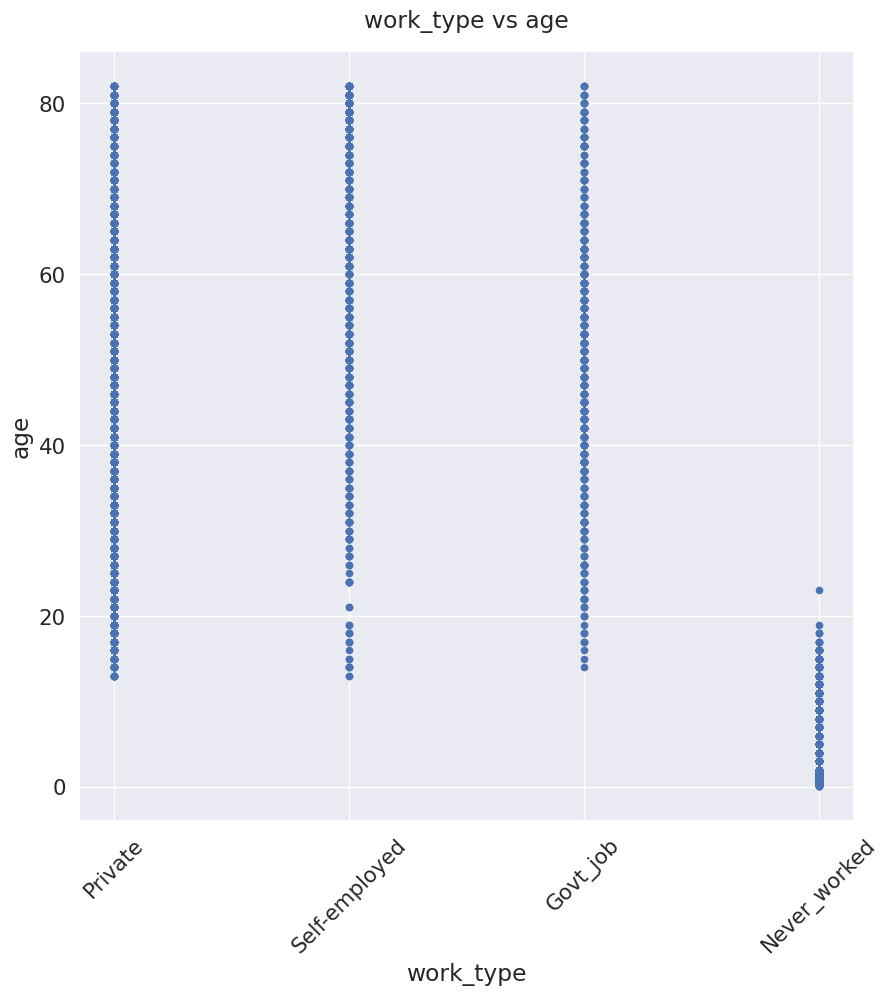

In [39]:
ax = df.plot.scatter(x="work_type", y="age", rot=45, figsize=(10, 10))
ax.set_title("work_type vs age", y=1.02)
plt.show()

We have now reduced the work_type to just 4 categories and handled some of the outliers in the simplest way possible.

#### smoking_status vs age

In [40]:
## Group by 'smoking_status' and aggregate using the `describe` method

df.groupby("smoking_status").agg({"age": "describe"})


age                                                     
                  count       mean        std    min   25%   50%   75%   max
smoking_status                                                              
Unknown          1544.0  30.237047  25.049863   0.08   8.0  23.0  51.0  82.0
formerly smoked   884.0  54.962670  17.624810  10.00  43.0  57.0  69.0  82.0
never smoked     1892.0  46.744715  19.769584  10.00  31.0  47.0  62.0  82.0
smokes            789.0  47.096324  16.413002  10.00  33.0  47.0  59.0  82.0

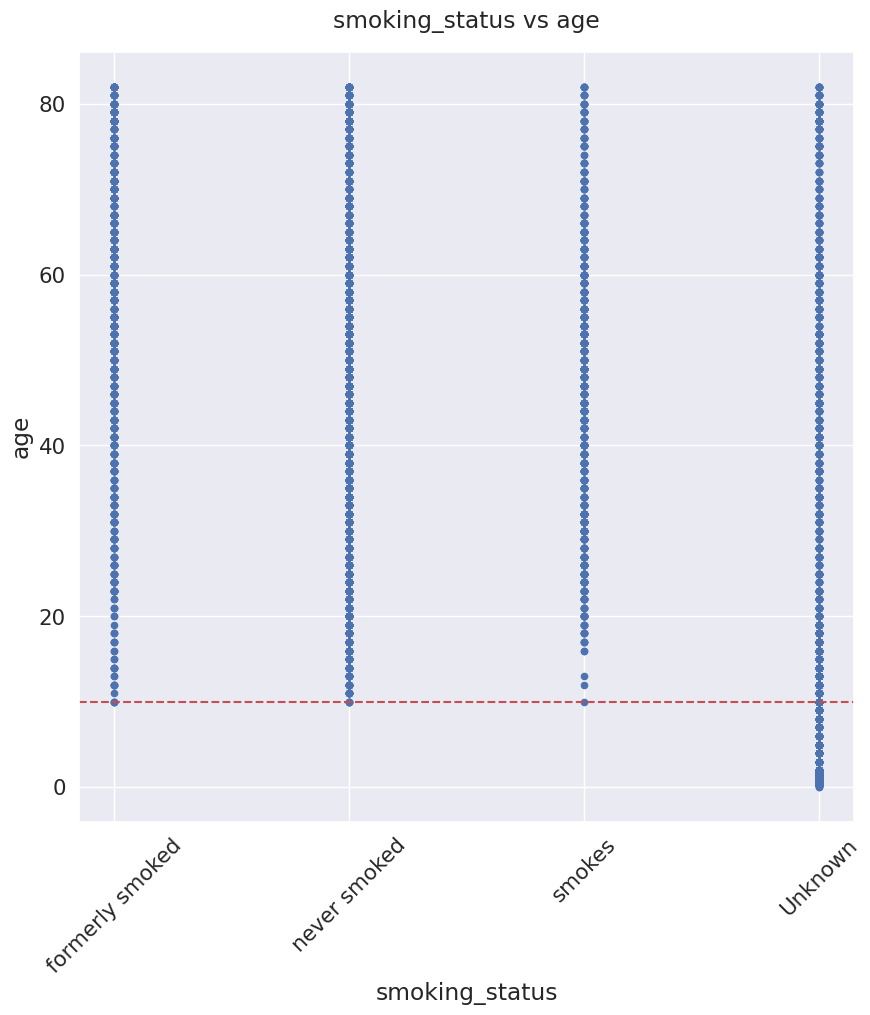

In [41]:
ax = df.plot.scatter(x="smoking_status", y="age", rot=45, figsize=(10, 10))
ax.set_title("smoking_status vs age", y=1.02)
ax.axhline(y=10, c="r", linestyle="dashed")
plt.show()

**<h5>Let's make some more assumptions on the data</h5>**

<li>We can clearly see that people below 10 years are not found smoking in this dataset</li>

<li>Let's make an assumption that person below 10 years can not smoke</li>

<li>But there are some people whose smoking status is unknown even if they are below that age limit</li>

<li>People whose smoking status is unknown and below 10 years age limit can thus be changed to never smoked</li>

In [42]:
df.loc[(df["smoking_status"] == "Unknown") & (df["age"] < 10), "smoking_status"] = "never smoked"

Let us now look at the updated plot of *smoking_status*

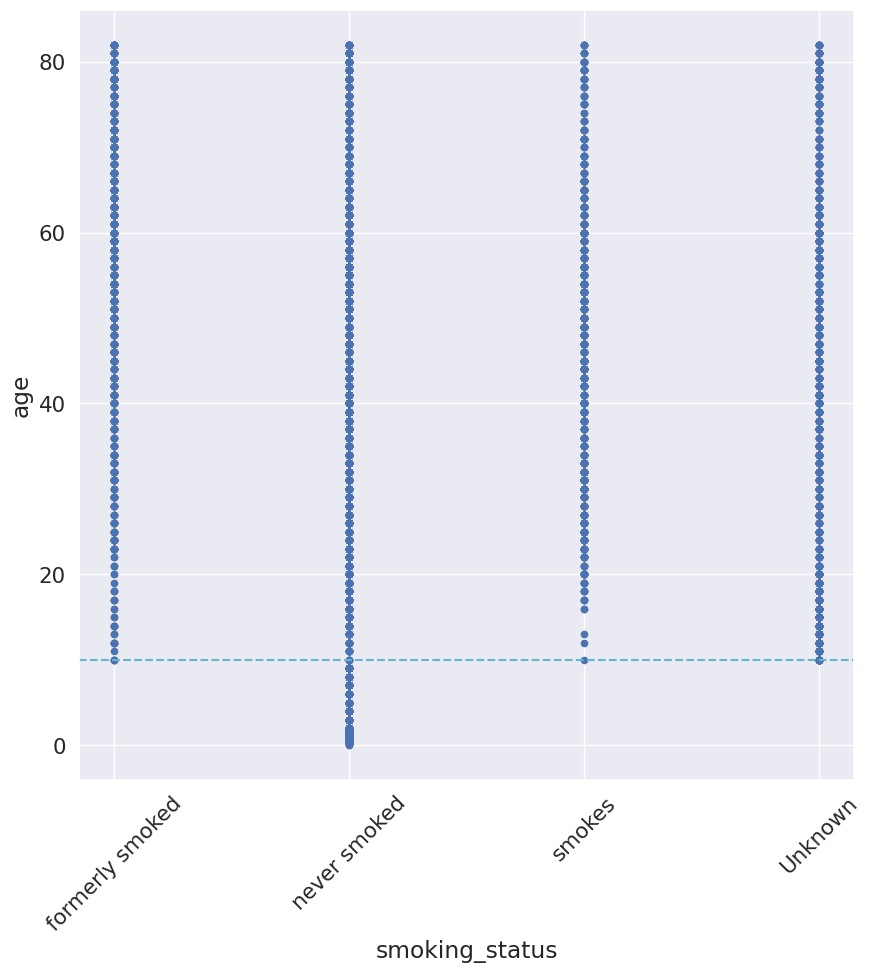

In [43]:
## scatter plot of smoking status vs age 
## assumptions were made on the data

ax = df.plot.scatter(x="smoking_status", y="age", rot=45, figsize=(10, 10))
ax.axhline(y=10, c="c", linestyle="dashed")
plt.show()

It's quite hard to make an assumption on the remaining *Unknown* *smoking_staus*. We can convert it to pandas missing value marker (NaN) since they're essentially missing values but let's leave them as it is for now.

#### gender vs stroke

Let us now look at the distribution of our target variable within a categorical variable

In [44]:
df.groupby(["gender", "stroke"]).size()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
dtype: int64

In [45]:
df.groupby(["gender", "stroke"]).size().unstack()

stroke,0,1
gender,,
Female,2853,141
Male,2007,108


Let's make a visualization similar to our univariate analysis but with the added information of the target variable distribution.

In [46]:
def bivariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)
    ax = data.groupby([xlabel, "stroke"]).size().unstack().plot.bar(
        stacked=True,
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    ax.set_title(f"Distribution of {xlabel} with respect to the stroke", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

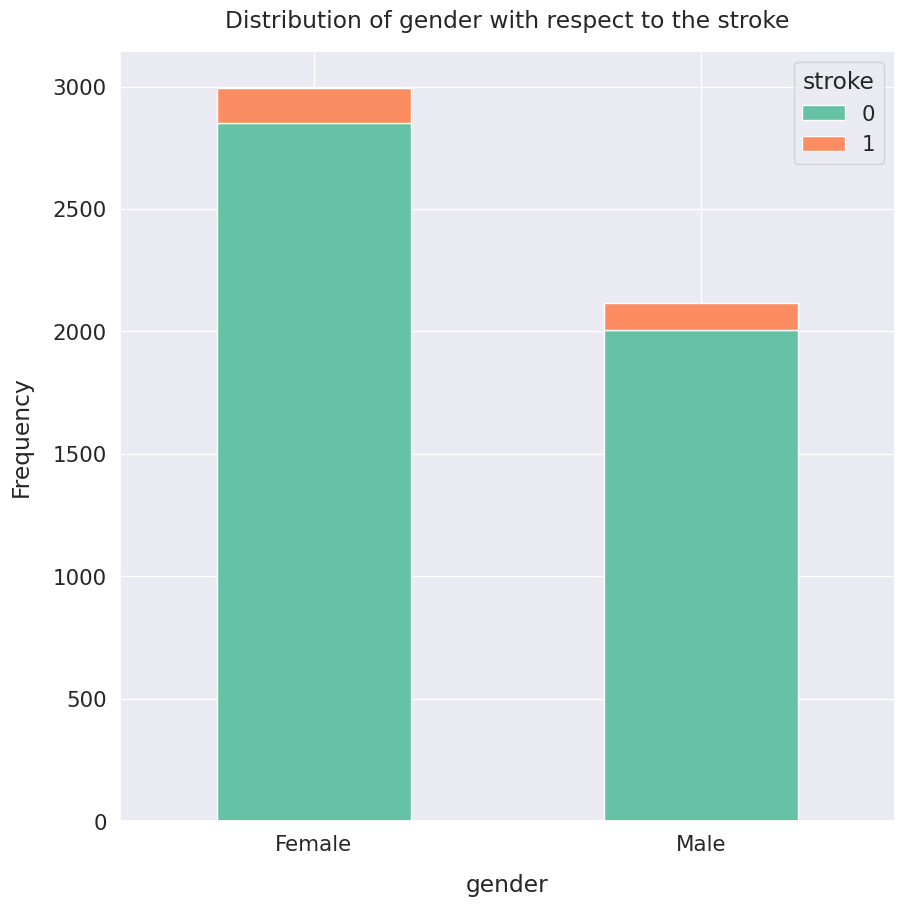

In [47]:
bivariate_barplot(data=df, xlabel="gender")

Let's put this into a different perspective by calculating the percentage probability of each category having a stroke.

* We will first need the data of stroke victims for each category. Since the stroke values are just 0s and 1s, we can easily calculate it if we `groupby()` the category and then add the stroke values.
* To calculate the percent probability we'll need the sample size as well.

In [48]:
feature_impact = df.groupby("gender")["stroke"].agg(["sum", "size"])
feature_impact

,sum,size
gender,,
Female,141,2994
Male,108,2115


In [49]:
feature_impact_probability = feature_impact["sum"] / feature_impact["size"] * 100
feature_impact_probability

gender
Female    4.709419
Male      5.106383
dtype: float64

<li>From above, there is 4.7% probability of stroke occurance in female and 5.1% probability of stroke occurance in male in the above datasets</li>

Let's wrap this up in a function to reuse it in the future

In [50]:
def calculate_feature_impact_probability(data, feature, label="stroke"):
    feature_impact = df.groupby(feature)[label].agg(["sum", "size"])
    feature_impact_probability = feature_impact["sum"] / feature_impact["size"] * 100
    return feature_impact_probability


#### ever_married vs stroke

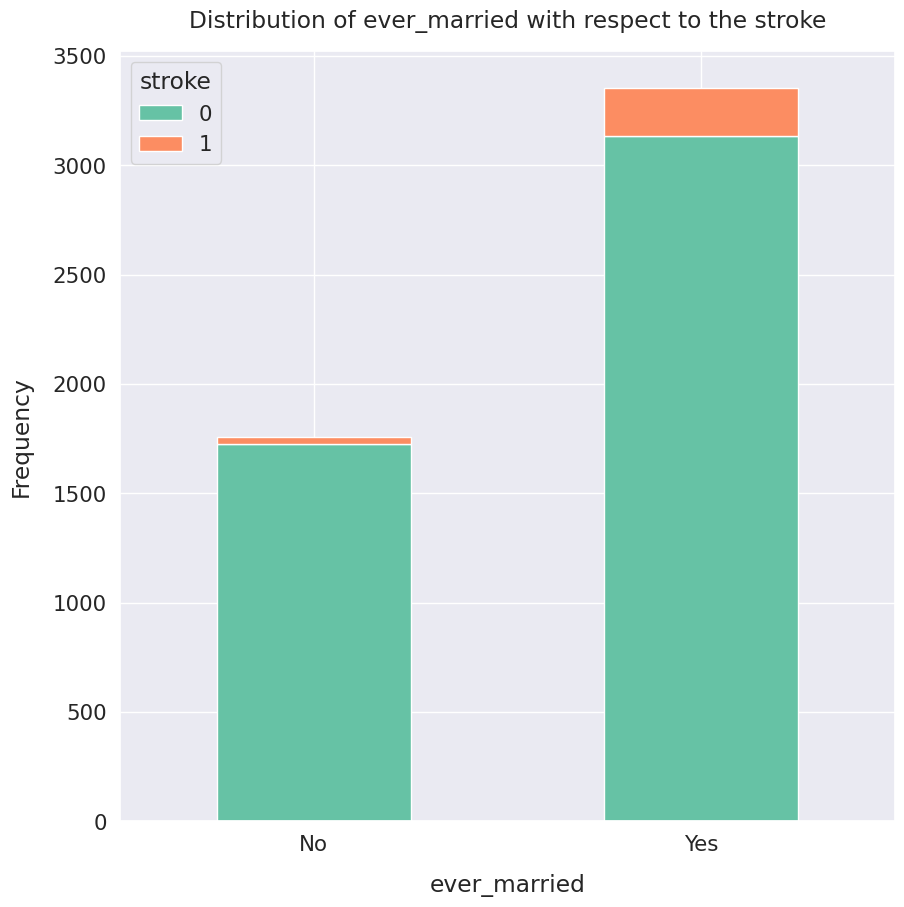

In [51]:
##  bivariate plot for "ever_married" field

bivariate_barplot(data=df, xlabel="ever_married")


In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
##  the impact of "ever_married" on our target variable

calculate_feature_impact_probability(data=df, feature="ever_married")


ever_married
No     1.651481
Yes    6.561288
dtype: float64

<li>There is a chance of 6.5% of stroke occurance to the married people and 1.65% to the unmarried people.</li>

#### Residence_type vs stroke

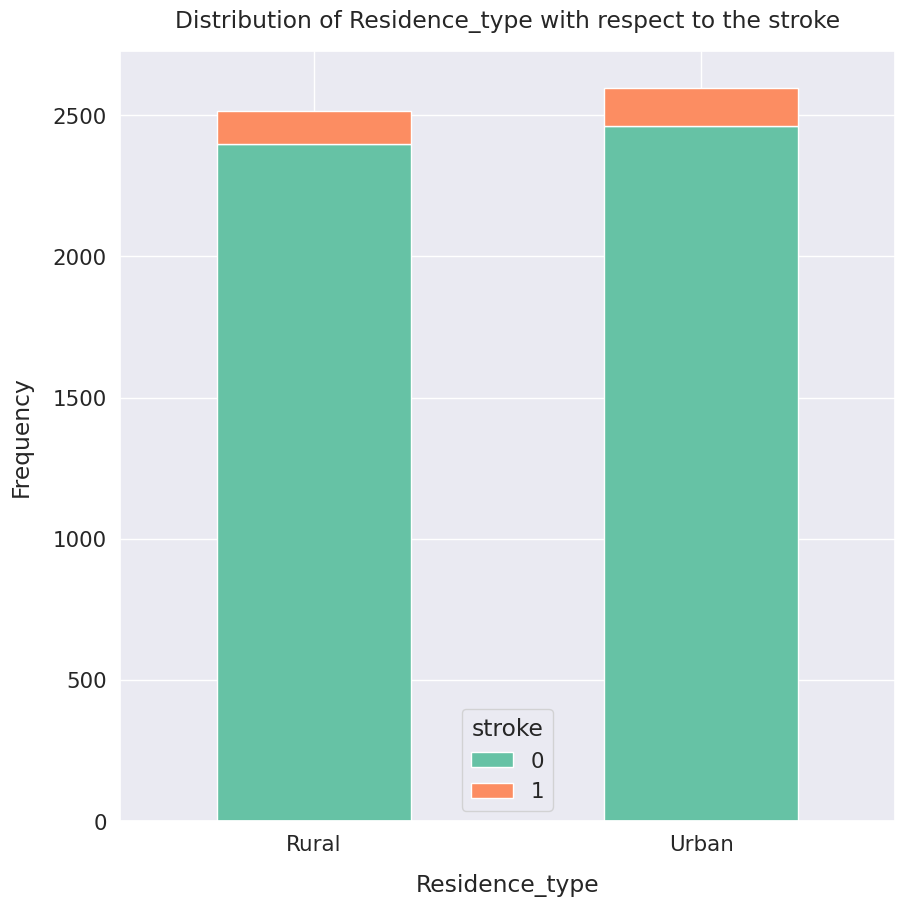

In [54]:
##  bivariate plot for "Residence_type" field

bivariate_barplot(data=df, xlabel="Residence_type")


In [55]:
##  the impact of "Residence_type" on our target variable

calculate_feature_impact_probability(data=df, feature="Residence_type")


Residence_type
Rural    4.536411
Urban    5.200308
dtype: float64

<li>People from Rural residence type have 4.55% probability of stroke while people from Urbal residence type have 5.2%.</li>

#### work_type vs stroke

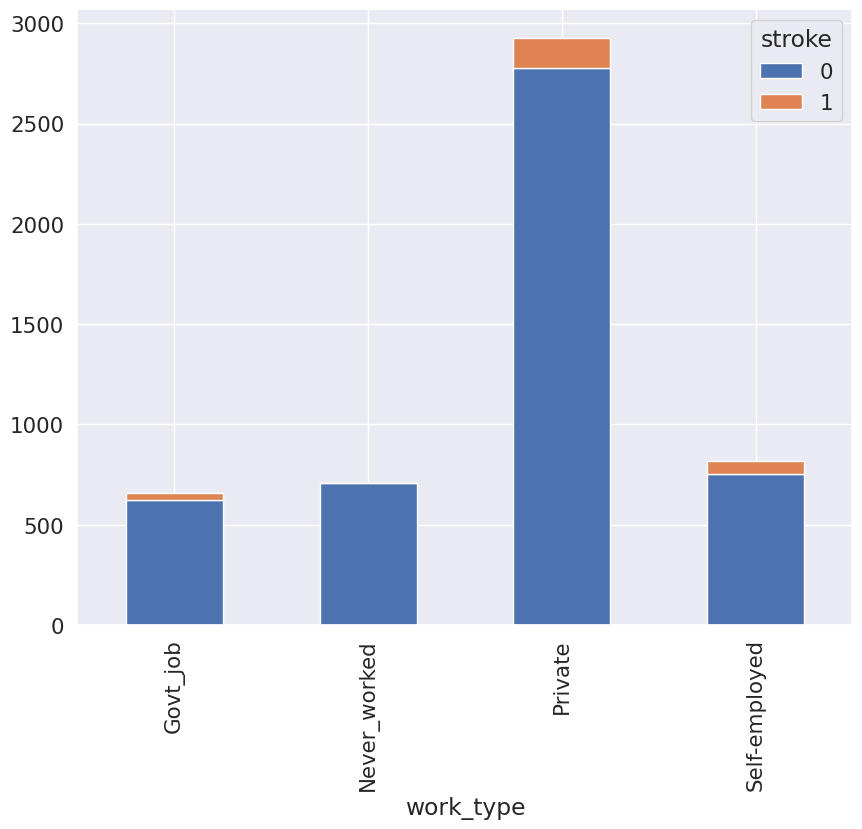

In [56]:
##  bivariate plot for "work_type" field

df.groupby(["work_type", "stroke"]).size().unstack().plot.bar(stacked=True, figsize=(10, 8))
plt.show()


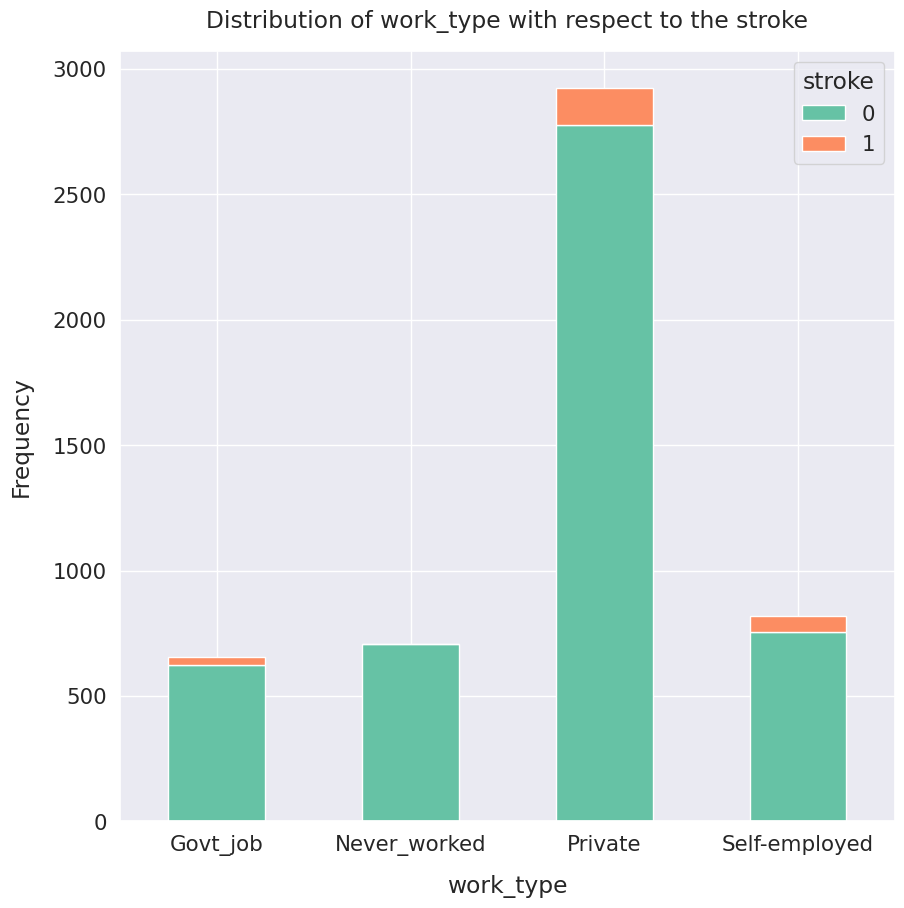

In [57]:
bivariate_barplot(data=df, xlabel="work_type")

In [58]:
##  the impact of "work_type" on our target variable

calculate_feature_impact_probability(data=df, feature="work_type")


work_type
Govt_job         5.022831
Never_worked     0.282087
Private          5.095759
Self-employed    7.936508
dtype: float64

<li>With the above information, self-employed people have the higher chance of stroke occurance that is 7.93% while never worked person have less chance of stroke that is 0.28%.</li>
<li>People with government job and provate job have 5.02% and 5.09% of stroke chance respectively.</li>

#### smoking_status vs stroke

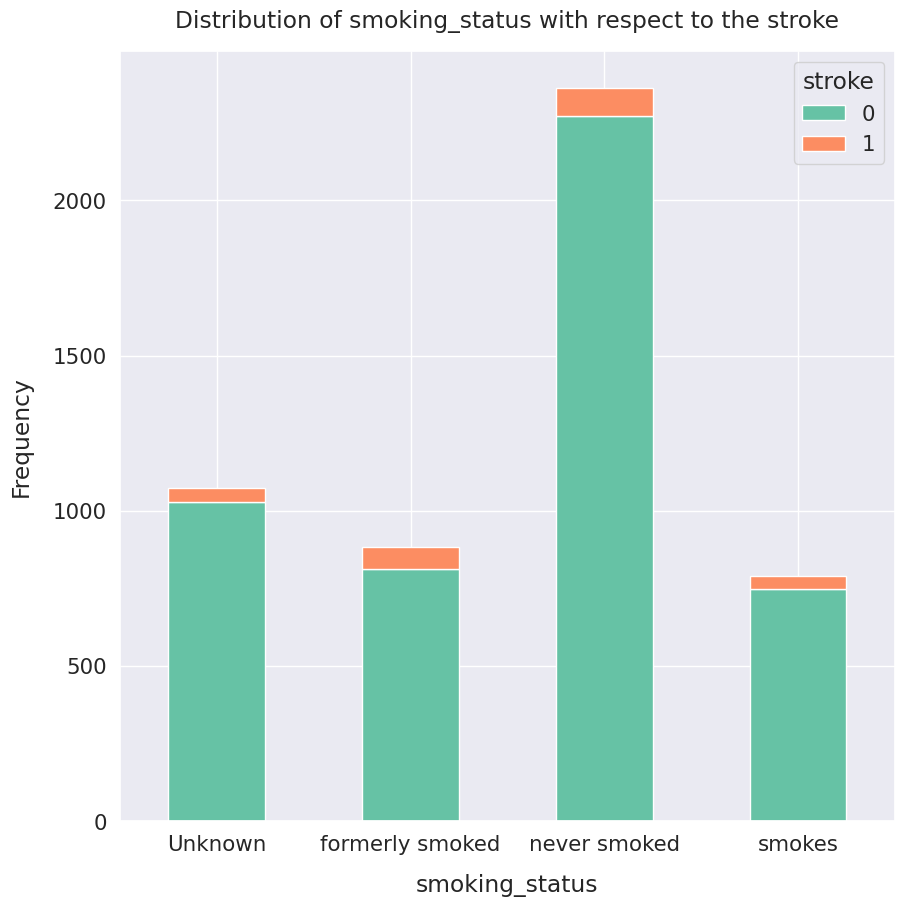

In [59]:
##  bivariate plot for "smoking_status" field

bivariate_barplot(data=df, xlabel="smoking_status")


In [60]:
##  the impact of "smoking_status" on our target variable

calculate_feature_impact_probability(data=df, feature="smoking_status")


smoking_status
Unknown            4.283054
formerly smoked    7.918552
never smoked       3.852667
smokes             5.323194
dtype: float64

<li>Formerly smoked persons have higher chance of stroke that is 7.91% while never smoked person have less chance of stroke which is 3.85%.</li>
<li>Similarly, People who smoke now have 5.3% chance of stroke and people who are unknown have 4.28% chance of stroke.</li>

#### hypertension vs stroke

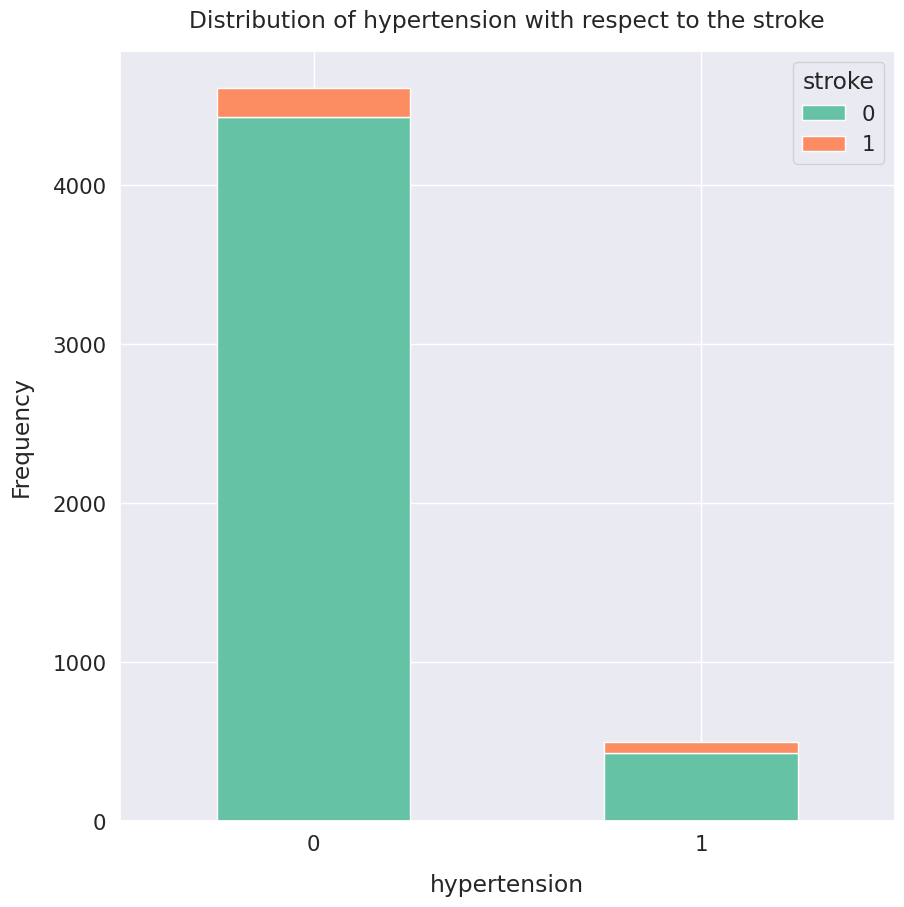

In [61]:
##  bivariate plot for "hypertension" field

bivariate_barplot(data=df, xlabel="hypertension")


In [62]:
## the impact of "hypertension" on our target variable

calculate_feature_impact_probability(data=df, feature="hypertension")


hypertension
0     3.968770
1    13.253012
dtype: float64

<li>People with hypertension have 13.25% probability of stroke.</li>
<li>People without hypertension have only 3.96% chance of stroke.</li>

#### heart_disease vs stroke

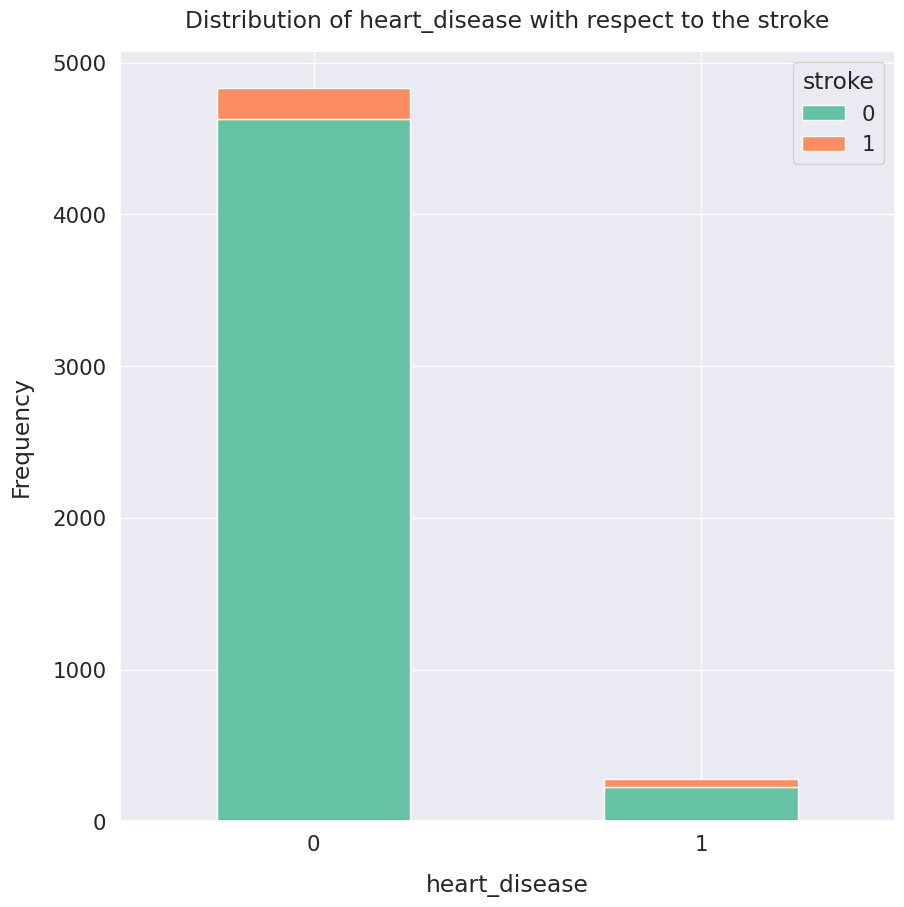

In [63]:
##  bivariate plot for "heart_disease" field

bivariate_barplot(data=df, xlabel="heart_disease")


In [64]:
##  impact of "heart_disease" on our target variable

calculate_feature_impact_probability(data=df, feature="heart_disease")


heart_disease
0     4.179599
1    17.028986
dtype: float64

In [65]:
df[numerical_features].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238312,0.333228
avg_glucose_level,0.238312,1.000000,0.175672
bmi,0.333228,0.175672,1.000000


<li>From the above information no any features are highly correlated with each other.</li>
<li>Correlation of age with avg_glucose_level and bmi is 0.238 and 0.194 respectively.</li>
<li>Correlation of bmi with avg_glucose_level is 0.12.</li>
<li>Correlation with self is obviously 1.</li>

Let's see the correlation of numerical variables with the target variable

In [66]:
df[numerical_features + [target_variable]].corr()
# target_variable

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238312,0.333228,0.245251
avg_glucose_level,0.238312,1.000000,0.175672,0.131991
bmi,0.333228,0.175672,1.000000,0.042341
stroke,0.245251,0.131991,0.042341,1.000000


<li>From above data we can see that age is highly correlated with stroke which is 0.24 than avg_glucose_level and bmi.</li>
<li>Age has a greater influence on stroke risk than average glucose levels and BMI.


</li>

Let's finally see the scatter plots by defining a reusable function

In [67]:
def scatter_plot(data, x, y, label="stroke"):
    data.sort_values(label).plot.scatter(
        x=x,
        y=y,
        c=label,
        colormap=sns.color_palette("flare", as_cmap=True),
        figsize=(10, 10),
    )

#### age vs bmi

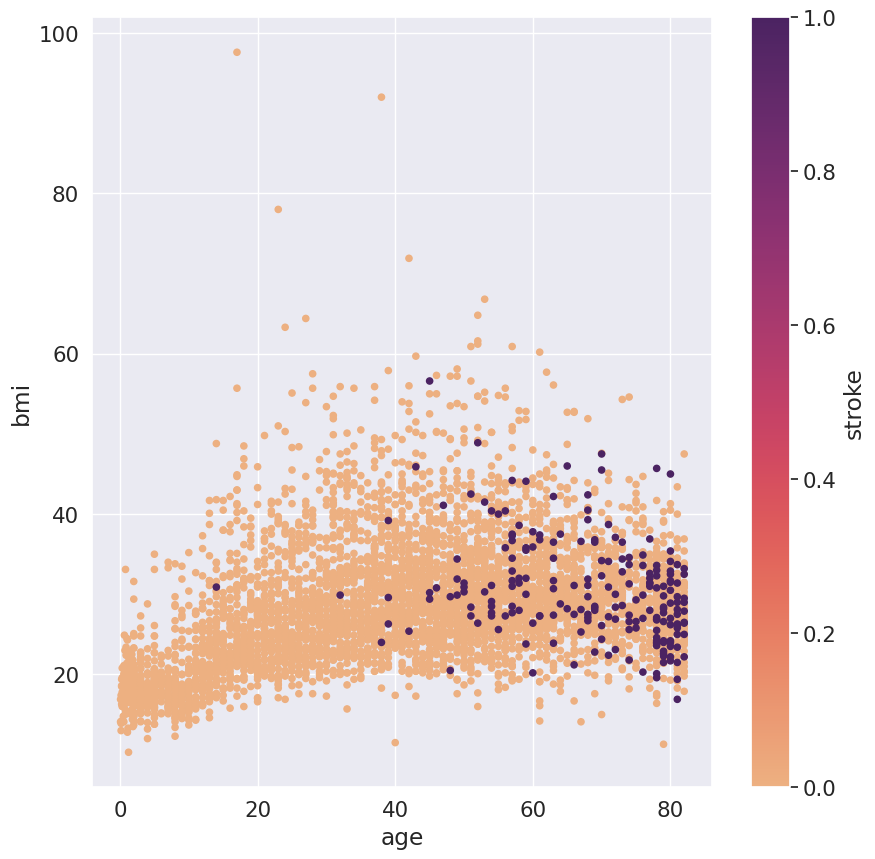

In [68]:
scatter_plot(data=df, x="age", y="bmi")

<li>According to the above diagram, it can be seen that as age increases stroke also increases. It means there is positive correlation between age and stroke.</li>
<li>There is no such relation between bmi and stroke. BMI of must people found between 20 and 40.</li>

#### age vs avg_glucose_level

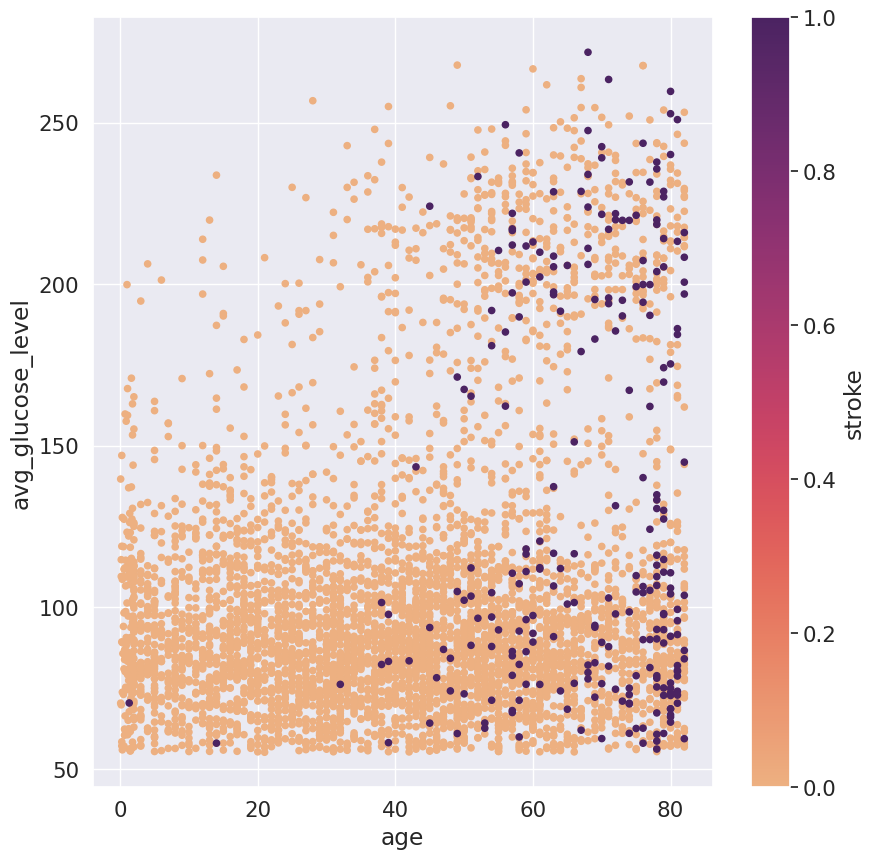

In [69]:
##  the scatter plot of "age" vs "avg_glucose_level" on our target variable

scatter_plot(data=df, x="age", y="avg_glucose_level")


<li>From above scatterplot, we can see that age above 60 have higher chance of stroke.</li>
<li>People whose bmi is between 50 to 120 and  200 to 250 and age is greater than 60 have higher stroke occurance.</li>

#### bmi vs avg_glucose_level

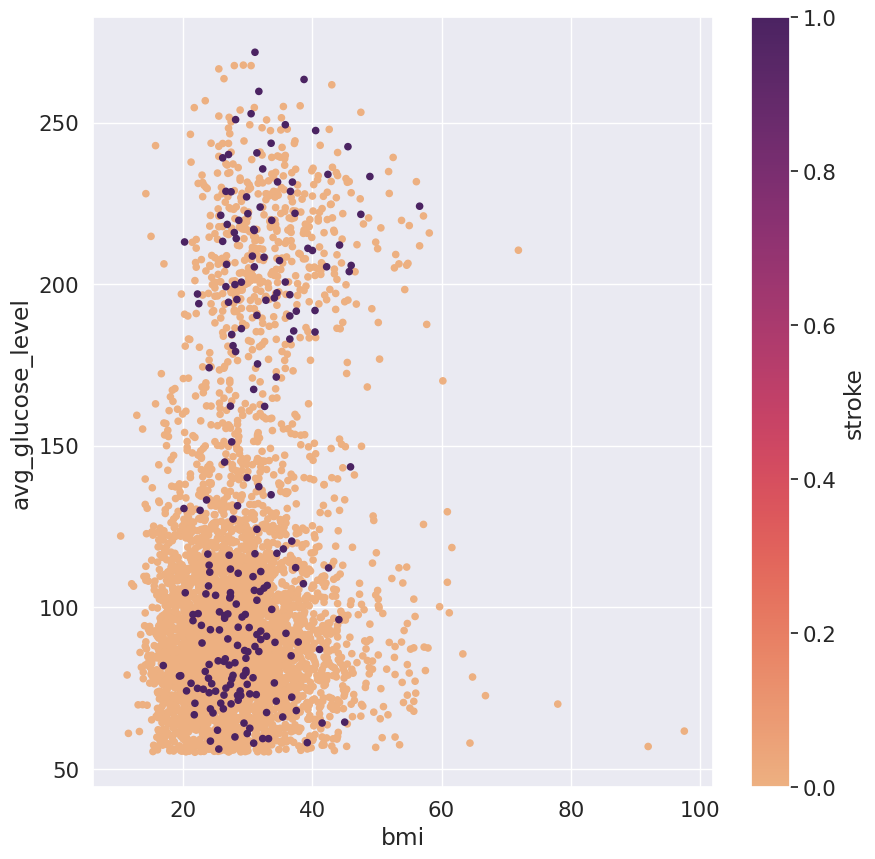

In [70]:
## scatter plot of "avg_glucose_level" vs "bmi" on our target variable

scatter_plot(data=df, x="bmi", y="avg_glucose_level")


<li>According to above diagram, people with 20-40 bmi and average glucose level of 50-120 and 200-250 have more stroke.</li>

# Data Preparation and Feature Engineering

In [71]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [73]:
df.gender.astype("category").cat.codes.value_counts() 


0    2994
1    2115
Name: count, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
def fit_label_encoder(feature):
    le = LabelEncoder()
    le.fit(feature)
    return le

**[Term] One-Hot Encoding**

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. **One-Hot Encoding is the process of creating dummy variables.**

In [76]:
pd.get_dummies(df.work_type)

,Govt_job,Never_worked,Private,Self-employed
0,False,False,True,False
1,False,False,False,True
2,False,False,True,False
3,False,False,True,False
4,False,False,False,True
...,...,...,...,...
5104,False,False,True,False
5105,False,False,False,True
5106,False,False,False,True
5107,False,False,True,False


In [77]:
def one_hot_encoder(data, feature_name, column_to_drop=None):
    modified_data = data.copy()
    feature = modified_data[feature_name]

    if column_to_drop is None or column_to_drop not in feature.unique():
        # Drop the column with least number of data points
        column_to_drop = feature.value_counts().index[-1]

    dummies = pd.get_dummies(feature)
    modified_data[dummies.columns] = dummies

    return modified_data.drop([column_to_drop, feature_name], axis=1)

In [78]:
feature_columns = categorical_features + numerical_features
features = df[feature_columns].copy()

gender_encoder = fit_label_encoder(feature=features.gender)

features["gender"] = gender_encoder.transform(features["gender"])

marital_status_encoder = fit_label_encoder(feature=features.ever_married)
features["ever_married"] = marital_status_encoder.transform(features["ever_married"])

residence_encoder = fit_label_encoder(feature=features.Residence_type)
features["Residence_type"] = residence_encoder.transform(features["Residence_type"])

features = one_hot_encoder(features, "work_type", column_to_drop="Never_worked")
features = one_hot_encoder(features, "smoking_status", column_to_drop="Unknown")
features.head()

,hypertension,gender,heart_disease,ever_married,Residence_type,age,avg_glucose_level,bmi,Govt_job,Private,Self-employed,formerly smoked,never smoked,smokes
0,0,1,1,1,1,67.0,228.69,36.6,False,True,False,True,False,False
1,0,0,0,1,0,61.0,202.21,NaN,False,False,True,False,True,False
2,0,1,1,1,0,80.0,105.92,32.5,False,True,False,False,True,False
3,0,0,0,1,1,49.0,171.23,34.4,False,True,False,False,False,True
4,1,0,0,1,0,79.0,174.12,24.0,False,False,True,False,True,False


### Data Imputation


In our case, the *bmi* column contains 201 missing data i.e. around 4%, so it is not suitable to drop the whole *bmi* column. Instead we need to impute the missing data with the best replacement strategy.

We will use `KNNImputer` from Sklearn to imput a missing values in bmi column. Under the hood it's also a replace by mean strategy.

#### KNNImputer

Inorder to use KNNImputer to fill missing values, all of our dataframe values should be in numerical form, since we will compute euclidean distance to find neighbors to missing data point. So, we will be using the encoded features instead of the original data.

In [79]:
from sklearn.impute import KNNImputer


imputter = KNNImputer(n_neighbors=30)
imputted_data = imputter.fit_transform(features)
imputted_data

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

This is just a numpy array so we need to convert it back to a DataFrame

In [80]:
features = pd.DataFrame(data=imputted_data, columns=features.columns)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hypertension       5109 non-null   float64
 1   gender             5109 non-null   float64
 2   heart_disease      5109 non-null   float64
 3   ever_married       5109 non-null   float64
 4   Residence_type     5109 non-null   float64
 5   age                5109 non-null   float64
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   Govt_job           5109 non-null   float64
 9   Private            5109 non-null   float64
 10  Self-employed      5109 non-null   float64
 11  formerly smoked    5109 non-null   float64
 12  never smoked       5109 non-null   float64
 13  smokes             5109 non-null   float64
dtypes: float64(14)
memory usage: 558.9 KB


In [81]:
features.isna().sum()

hypertension         0
gender               0
heart_disease        0
ever_married         0
Residence_type       0
age                  0
avg_glucose_level    0
bmi                  0
Govt_job             0
Private              0
Self-employed        0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

Put the imputed data into the original dataset

In [82]:
features["bmi"].isnull().sum()

0

In [83]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
df[df["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5038,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5047,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5092,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5098,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [85]:
df["bmi"] = features["bmi"]
df["bmi"].isna().sum()

0

In [86]:
features.bmi.isna().sum()

0

In [87]:
features.shape

(5109, 14)

In [88]:
df.shape

(5109, 12)

In [89]:
df.loc[df["bmi"].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### Outlier Detection

Boxplots are the best way to detect outliers in a numerical variable

#### age

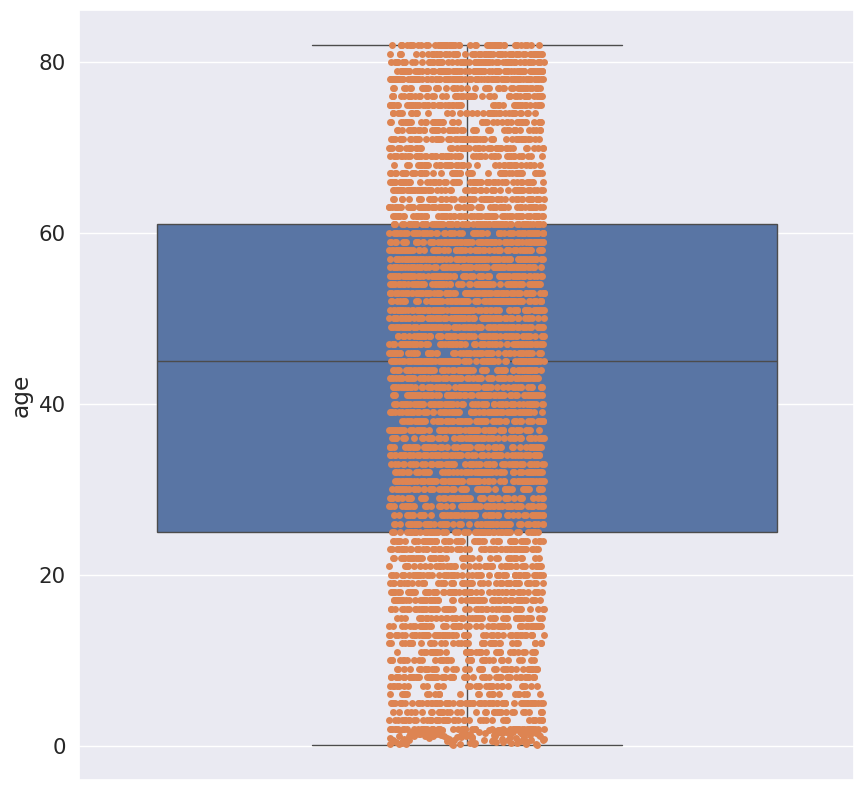

In [90]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.age)
sns.stripplot(data=features.age)
plt.show()

<li>There is no presence of outlier in Age column.</li>

#### Interquartile Range (IQR)

In descriptive statistics, the interquartile range is a measure of statistical dispersion, which is the spread of the data. It is defined as the difference between the 75th and 25th percentiles of the data.

##### IQR Filter

This technique uses the IQR to remove or impute outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR) is an outlier, and can be removed or imputed.

Let's write a function to get the interquartile range

In [91]:
def get_iqr(feature):
    quantile1, quantile3 = np.percentile(feature, [25, 75])
    iqr_value = quantile3 - quantile1
    lower_bound = quantile1 - 1.5 * iqr_value
    upper_bound = quantile3 + 1.5 * iqr_value
    return lower_bound, upper_bound

#### bmi

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.bmi)
sns.stripplot(data=features.bmi)
plt.show()

<li>From the given boxplot, we can see that there are many values that is beyond the 3 standard deviation.</li>

<li>Since, the bmi column is not gaussian distributed, we have to use inter quantile range for detecting the outliers</li>

<li>It is not always that outliers are not important for predictive modelling.</li>

<li>In predicting minority class in a class imbalance problem, outliers can play an important role for our model.</li>

<li>Since, we also have class imbalance problem in our dataset, we donot remove the outliers.</li>

<li>Instead of removing it, we have to deal with it smartly.</li>

<li>So we are replacing the extreme outlier values with the mean of values that are deviated from the inter quantile range.</li>

In [ ]:
lower, upper = get_iqr(features.bmi)
outlier_condition = (features.bmi < lower) | (features.bmi > upper)
print(lower, upper)
# print(outlier_condition)
features[outlier_condition] = features[outlier_condition].mean()
features[outlier_condition]

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.bmi)
sns.stripplot(data=features.bmi)
plt.show()

#### avg_glucose_level

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.avg_glucose_level)
sns.stripplot(data=features.avg_glucose_level)
plt.show()

<li>We can see a similar outlier trend in the <i>avg_glucose_level</i></li>

In [ ]:
lower, upper = get_iqr(features.avg_glucose_level)
outlier_condition = (features.avg_glucose_level < lower) | (features.avg_glucose_level > upper)
features[outlier_condition] = features[outlier_condition].mean()

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.avg_glucose_level)
sns.stripplot(data=features.avg_glucose_level)
plt.show()

### Feature Selection

Let us now prepare training and test data.

Training data and test data sets are two different but important parts in machine learning. While training data is necessary to teach an ML algorithm, testing data, as the name suggests, helps you to validate the progress of the algorithm's training and adjust or optimize it for improved results.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[categorical_features + numerical_features].copy()
y = df[target_variable].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    # To distribute each class in the train and test set evenly
    stratify=y,
    # Take a test size of 20%
    test_size=0.2,
    # Set a seed so that we can reproduce the result
    random_state=42,
)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

Let's check whether stratified split worked or not. To do that, we can check the percentage of data of each class in the train and test labels.

In [ ]:
y_train_counts = y_train.value_counts()
y_train_counts / y_train_counts.sum() * 100

In [ ]:
y_test_counts = y_test.value_counts()
y_test_counts / y_test_counts.sum() * 100

We can see that we have similar amount of data for each class in the train and test set

Now, let's generate the features for both train and test datasets

In [ ]:
gender_encoder = fit_label_encoder(X_train["gender"])
X_train["gender"] = gender_encoder.transform(X_train["gender"])
X_test["gender"] = gender_encoder.transform(X_test["gender"])

marital_status_encoder = fit_label_encoder(X_train["ever_married"])
X_train["ever_married"] = marital_status_encoder.transform(X_train["ever_married"])
X_test["ever_married"] = marital_status_encoder.transform(X_test["ever_married"])


residence_location_encoder = fit_label_encoder(X_train["Residence_type"])
X_train["Residence_type"] = residence_location_encoder.transform(X_train["Residence_type"])
X_test["Residence_type"] = residence_location_encoder.transform(X_test["Residence_type"])

X_train = one_hot_encoder(X_train, "work_type", column_to_drop="Never_worked")
X_test = one_hot_encoder(X_test, "work_type", column_to_drop="Never_worked")

X_train = one_hot_encoder(X_train, "smoking_status", column_to_drop="Unknown")
X_test = one_hot_encoder(X_test, "smoking_status", column_to_drop="Unknown")


### Feature Normalization

Given different input features with varying scales, feature normalization and standardization are used to guarantee that some machine learning models can work and also help to improve the model's training speed and performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

X_train[numerical_features] = scale.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scale.transform(X_test[numerical_features])

In [ ]:
# X_train["bmi"].isna().sum()
# X_train.loc[X_train["bmi"].isna()]

# Model Training

## **Logistic Regression**




In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train) # pass training data and training answer to model

#### Model Evaluation


* Logistic Regression
* K-Nearest Neighbors
* Decision Tree
* Support Vector Machines/SVC
* Naive Bayes